## Аналитика данных. Домашнее задание 3

#### Пирогов Евгений Александрович

In [19]:
import numpy as np
import glob
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

<IPython.core.display.Javascript object>

#### ЗАДАЧИ:

Ваша задача — проверить, как изменился мир тенниса за последнее время. Для анализа используйте этот датасет. Применяйте только данные из одиночного разряда (файлы в формате «atp_matches_YYYY.csv»). Желательно сопровождать выбранный статистический тест ссылкой на его документацию и указывать нулевую гипотезу, которую этот тест проверяет. Далеко не всегда это очевидно.

In [20]:
!git clone https://github.com/JeffSackmann/tennis_atp

fatal: destination path 'tennis_atp' already exists and is not an empty directory.


<IPython.core.display.Javascript object>

In [21]:
glob.glob("tennis_atp/atp_matches_[12][019][01298]*")

['tennis_atp\\atp_matches_1980.csv',
 'tennis_atp\\atp_matches_1981.csv',
 'tennis_atp\\atp_matches_1982.csv',
 'tennis_atp\\atp_matches_1983.csv',
 'tennis_atp\\atp_matches_1984.csv',
 'tennis_atp\\atp_matches_1985.csv',
 'tennis_atp\\atp_matches_1986.csv',
 'tennis_atp\\atp_matches_1987.csv',
 'tennis_atp\\atp_matches_1988.csv',
 'tennis_atp\\atp_matches_1989.csv',
 'tennis_atp\\atp_matches_1990.csv',
 'tennis_atp\\atp_matches_1991.csv',
 'tennis_atp\\atp_matches_1992.csv',
 'tennis_atp\\atp_matches_1993.csv',
 'tennis_atp\\atp_matches_1994.csv',
 'tennis_atp\\atp_matches_1995.csv',
 'tennis_atp\\atp_matches_1996.csv',
 'tennis_atp\\atp_matches_1997.csv',
 'tennis_atp\\atp_matches_1998.csv',
 'tennis_atp\\atp_matches_1999.csv',
 'tennis_atp\\atp_matches_2000.csv',
 'tennis_atp\\atp_matches_2001.csv',
 'tennis_atp\\atp_matches_2002.csv',
 'tennis_atp\\atp_matches_2003.csv',
 'tennis_atp\\atp_matches_2004.csv',
 'tennis_atp\\atp_matches_2005.csv',
 'tennis_atp\\atp_matches_2006.csv',
 

<IPython.core.display.Javascript object>

In [22]:
!pip install missingno

<IPython.core.display.Javascript object>

In [23]:
import missingno as msno

<IPython.core.display.Javascript object>

In [24]:
df = pd.concat(
    [pd.read_csv(i) for i in glob.glob("tennis_atp/atp_matches_[12][019][01298]*")],
    axis=0,
)

<IPython.core.display.Javascript object>

In [25]:
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,1,100437,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,6.0,NaN
1,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,2,100342,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2.0,NaN
2,1980-1725,Pepsi Grand Slam,Clay,4,A,19800208,3,100437,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,NaN
3,1980-205,Lagos,Clay,32,A,19800225,1,100259,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN
4,1980-205,Lagos,Clay,32,A,19800225,2,100135,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2023-0891,Pune,Hard,32,A,20230102,276,111581,NaN,NaN,...,37.0,21.0,10.0,9.0,6.0,10.0,113.0,507.0,NaN,NaN
102,2023-0891,Pune,Hard,32,A,20230102,275,126127,NaN,NaN,...,31.0,16.0,4.0,7.0,1.0,5.0,60.0,781.0,115.0,490.0
103,2023-0891,Pune,Hard,32,A,20230102,273,111513,NaN,NaN,...,33.0,21.0,11.0,9.0,2.0,5.0,70.0,738.0,50.0,895.0
104,2023-0891,Pune,Hard,32,A,20230102,272,109739,NaN,Q,...,47.0,30.0,19.0,13.0,2.0,6.0,159.0,354.0,127.0,444.0


<IPython.core.display.Javascript object>

In [26]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

<IPython.core.display.Javascript object>

In [27]:
df.info

<bound method DataFrame.info of     tourney_id      tourney_name surface  draw_size tourney_level  \
0    1980-1725  Pepsi Grand Slam    Clay          4             A   
1    1980-1725  Pepsi Grand Slam    Clay          4             A   
2    1980-1725  Pepsi Grand Slam    Clay          4             A   
3     1980-205             Lagos    Clay         32             A   
4     1980-205             Lagos    Clay         32             A   
..         ...               ...     ...        ...           ...   
101  2023-0891              Pune    Hard         32             A   
102  2023-0891              Pune    Hard         32             A   
103  2023-0891              Pune    Hard         32             A   
104  2023-0891              Pune    Hard         32             A   
105  2023-0891              Pune    Hard         32             A   

     tourney_date  match_num  winner_id  winner_seed winner_entry  ...  \
0        19800208          1     100437          NaN          NaN

<IPython.core.display.Javascript object>

Из документации нам известно, что: 
"ATP rankings are mostly complete from 1985 to the present. 1982 is missing, and rankings from 1973-1984 are only intermittent./Рейтинги ATP в основном составлены с 1985 года по настоящее время. 1982 год отсутствует, а рейтинги 1973-1984 годов представлены лишь с перерывами."

Проверяем это утверждение.

<AxesSubplot: xlabel='tourney_date', ylabel='tourney_id'>

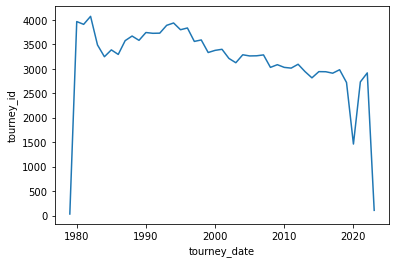

<IPython.core.display.Javascript object>

In [28]:
df.tourney_date.apply(lambda x: "%.0f" % round(x, 0))
df.loc[:, "tourney_date"] = pd.to_datetime(df["tourney_date"], format="%Y%m%d")

df_years = df.groupby(df["tourney_date"].dt.year).count().tourney_id
sns.lineplot(data=df_years)

Видим что начиная с 2019 года данные не стабильны, поэтому отметит для себя временной период с 1985 по 2018 год.

#### 1 Вы хотите узнать, как много значит ранг игрока в теннисе. Проверьте следующие утверждения:

а) Если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью. (Если хотите проверить статистически — формируйте выборку как отклонение от ожидаемого количества побед при случайном исходе);

Создадим таблицу под наши цели, без пропусков.

In [29]:
df_work = df[
    (df["tourney_date"] > "1985-01-01")
    & (df["tourney_date"] < "2019-01-01")
    & df["winner_rank"].notna()
    & df["loser_rank"].notna()
].loc[:, ["tourney_id", "tourney_date", "winner_rank", "loser_rank"]]

<IPython.core.display.Javascript object>

In [30]:
df_work["winner_rank_over20"] = (df_work["loser_rank"] - df_work["winner_rank"]) > 20

df_work["game_rank_over20"] = abs(df_work["winner_rank"] - df_work["loser_rank"]) > 20

<IPython.core.display.Javascript object>

In [31]:
df_work

,tourney_id,tourney_date,winner_rank,loser_rank,winner_rank_over20,game_rank_over20
2755,1984-605,1985-01-08,6.0,7.0,False,False
2756,1984-605,1985-01-08,13.0,12.0,False,False
2757,1984-605,1985-01-08,11.0,17.0,False,False
2758,1984-605,1985-01-08,9.0,16.0,False,False
2759,1984-605,1985-01-08,1.0,6.0,False,False
...,...,...,...,...,...,...
80,2019-0891,2018-12-31,103.0,110.0,False,False
81,2019-0891,2018-12-31,132.0,96.0,False,True
82,2019-0891,2018-12-31,97.0,82.0,False,False
83,2019-0891,2018-12-31,100.0,108.0,False,False


<IPython.core.display.Javascript object>

In [32]:
winner_ratio = (
    df_work.loc[:, ["winner_rank_over20", "game_rank_over20"]]
    .groupby(df_work["tourney_date"].dt.year)
    .sum()
)

<IPython.core.display.Javascript object>

In [33]:
winner_ratio["winner_random"] = winner_ratio["game_rank_over20"] / 2

<IPython.core.display.Javascript object>

In [34]:
winner_ratio

,winner_rank_over20,game_rank_over20,winner_random
tourney_date,,,
1985,1724,2553,1276.5
1986,1721,2496,1248.0
1987,1907,2740,1370.0
1988,2005,2861,1430.5
1989,1968,2836,1418.0
1990,1887,2798,1399.0
1991,1787,2700,1350.0
1992,1830,2692,1346.0
1993,1939,2842,1421.0


<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='tourney_date'>

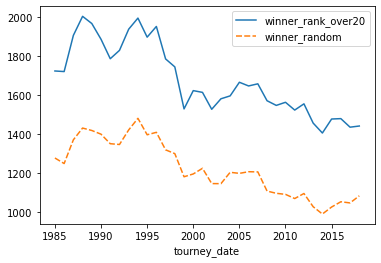

<IPython.core.display.Javascript object>

In [35]:
sns.lineplot(data=winner_ratio[["winner_rank_over20", "winner_random"]])

H0 - Нулевая гипотеза: количество побед участников с рангом выше, чем у второго участника, более чем на 20, не отличается от количества побед при случайном исходе (при вероятности победы 50%)

H1 - Альтернативная гипотеза: при ранге, более чем на 20 превышающем ранг соперника, количество побед таких участников больше

Проверим гипотезу с помощью t-теста 
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).

In [36]:
stats.ttest_ind(
    winner_ratio["winner_rank_over20"],
    winner_ratio["winner_random"],
    alternative="greater",
)

Ttest_indResult(statistic=11.459525069106963, pvalue=1.1995263802206189e-17)

<IPython.core.display.Javascript object>

Если распределение не нормальное, проверяем тестом Уилкоксона 
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)

In [37]:
stats.wilcoxon(
    winner_ratio["winner_rank_over20"],
    winner_ratio["winner_random"],
    alternative="greater",
)

WilcoxonResult(statistic=595.0, pvalue=1.8264165951516497e-07)

<IPython.core.display.Javascript object>

p-value меньше 0.05, следовательно, отвергаем нулевую гипотезу, следовательно, при ранге, более чем на 20 превышающем ранг соперника, количество побед таких участников больше.

б) Если ранг игрока находится в окне +-5 позиций, то вероятность победы будет значительно отличаться от гипотезы из предыдущего случая. Для проверки статистической значимости выборку можно сделать как среднее по годам (например, с 1980 по 2022г.). Подумайте, как правильно сформировать репрезентативную выборку.

Доработаем нашу рабочую таблицу:

In [38]:
df_work["game_rank_over5"] = abs(df_work["winner_rank"] - df_work["loser_rank"]) < 6

df_work["winner_rank_over"] = (df_work["loser_rank"] > df_work["winner_rank"]) & (
    df_work["game_rank_over5"] == True
)

<IPython.core.display.Javascript object>

In [39]:
df_work

,tourney_id,tourney_date,winner_rank,loser_rank,winner_rank_over20,game_rank_over20,game_rank_over5,winner_rank_over
2755,1984-605,1985-01-08,6.0,7.0,False,False,True,True
2756,1984-605,1985-01-08,13.0,12.0,False,False,True,False
2757,1984-605,1985-01-08,11.0,17.0,False,False,False,False
2758,1984-605,1985-01-08,9.0,16.0,False,False,False,False
2759,1984-605,1985-01-08,1.0,6.0,False,False,True,True
...,...,...,...,...,...,...,...,...
80,2019-0891,2018-12-31,103.0,110.0,False,False,False,False
81,2019-0891,2018-12-31,132.0,96.0,False,True,False,False
82,2019-0891,2018-12-31,97.0,82.0,False,False,False,False
83,2019-0891,2018-12-31,100.0,108.0,False,False,False,False


<IPython.core.display.Javascript object>

In [40]:
winner_ratio_5 = (
    df_work.loc[:, ["winner_rank_over", "game_rank_over5"]]
    .groupby(df_work["tourney_date"].dt.year)
    .sum()
)

<IPython.core.display.Javascript object>

In [41]:
winner_ratio_5["winner_random_5"] = winner_ratio_5["game_rank_over5"] / 2

<IPython.core.display.Javascript object>

In [42]:
winner_ratio_5

,winner_rank_over,game_rank_over5,winner_random_5
tourney_date,,,
1985,94,174,87.0
1986,115,217,108.5
1987,106,190,95.0
1988,94,191,95.5
1989,101,179,89.5
1990,124,210,105.0
1991,101,214,107.0
1992,114,236,118.0
1993,115,237,118.5


<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='tourney_date'>

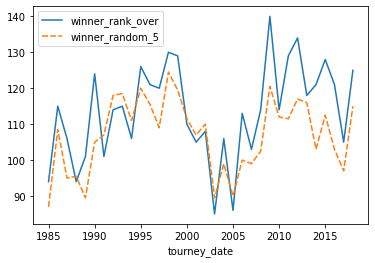

<IPython.core.display.Javascript object>

In [43]:
sns.lineplot(data=winner_ratio_5[["winner_rank_over", "winner_random_5"]])

H0 - Нулевая гипотеза: количество побед участников с рангом в окне +-5 позиций, не отличается от количества побед при случайном исходе (при вероятности победы 50%)

H1 - Альтернативная гипотеза: при диапазоне рангов +-5 позиций, количество побед таких участников больше

Проверим гипотезу с помощью t-теста (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).

In [44]:
stats.ttest_ind(
    winner_ratio_5["winner_rank_over"],
    winner_ratio_5["winner_random_5"],
    alternative="greater",
)

Ttest_indResult(statistic=2.2688567935494555, pvalue=0.013276434022997252)

<IPython.core.display.Javascript object>

Если распределение не нормальное, проверяем тестом Уилкоксона (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)

In [45]:
stats.wilcoxon(
    winner_ratio_5["winner_rank_over"],
    winner_ratio_5["winner_random_5"],
    alternative="greater",
)

WilcoxonResult(statistic=519.5, pvalue=7.326338019977877e-05)

<IPython.core.display.Javascript object>

p-value меньше 0.05, следовательно, отвергаем нулевую гипотезу.

2) Правда ли, что среднее количество сетов, которое необходимо любому игроку для победы в матче, сокращается со временем? Разбейте данные на две группы — с 1980 до 2001 гг. и 2002-2022 гг. Как изменилось среднее количество сетов, которое победитель затратил на игру? Является ли разница средних этих двух выборок статистически значимой? Выбор статистического теста обоснуйте.

Нам потребуется дополнительная таблица, под наши цели:

In [46]:
df_sets = df[df["score"].notna()].loc[:, ["tourney_date", "score"]]

<IPython.core.display.Javascript object>

In [47]:
df_sets

,tourney_date,score
0,1980-02-08,6-2 6-3
1,1980-02-08,7-6 6-3
2,1980-02-08,6-1 5-7 6-1
3,1980-02-25,6-3 6-2
4,1980-02-25,6-4 6-4
...,...,...
101,2023-01-02,6-2 6-4
102,2023-01-02,6-0 6-3
103,2023-01-02,6-2 6-4
104,2023-01-02,6-2 3-6 6-3


<IPython.core.display.Javascript object>

In [48]:
df_sets["sets_len"] = df_sets["score"].map(lambda x: len(x.split()))

<IPython.core.display.Javascript object>

In [49]:
df_sets

,tourney_date,score,sets_len
0,1980-02-08,6-2 6-3,2
1,1980-02-08,7-6 6-3,2
2,1980-02-08,6-1 5-7 6-1,3
3,1980-02-25,6-3 6-2,2
4,1980-02-25,6-4 6-4,2
...,...,...,...
101,2023-01-02,6-2 6-4,2
102,2023-01-02,6-0 6-3,2
103,2023-01-02,6-2 6-4,2
104,2023-01-02,6-2 3-6 6-3,3


<IPython.core.display.Javascript object>

In [50]:
df_sets["year"] = df_sets["tourney_date"].dt.year
df_sets

,tourney_date,score,sets_len,year
0,1980-02-08,6-2 6-3,2,1980
1,1980-02-08,7-6 6-3,2,1980
2,1980-02-08,6-1 5-7 6-1,3,1980
3,1980-02-25,6-3 6-2,2,1980
4,1980-02-25,6-4 6-4,2,1980
...,...,...,...,...
101,2023-01-02,6-2 6-4,2,2023
102,2023-01-02,6-0 6-3,2,2023
103,2023-01-02,6-2 6-4,2,2023
104,2023-01-02,6-2 3-6 6-3,3,2023


<IPython.core.display.Javascript object>

По правилам большого тенниса может быть 3 или 5 сетов.

##### У мужчин на ТБШ и Кубке девисса играется пять сетов с победой в три сета, на остальных турнирах 3 с победой в два сета.
##### У женщин игра всегда продолжается в три сета, с победой в два.

Поэтому оставим игры с количеством сетов от 2 до 5.

По условию задачи нас интересуют игры с 1980 года, разбитые на две группы — с 1980 до 2001 гг. и 2002-2022 гг.

In [51]:
df_sets = df_sets[
    (df_sets["sets_len"] > 1)
    & (df_sets["sets_len"] < 6)
    & (df_sets["tourney_date"].dt.year > 1979)
]

<IPython.core.display.Javascript object>

In [52]:
df_sets["period"] = np.where((df_sets["year"] < 2002), "1980-2001", "2002-2022")

df_sets

C:\Users\oldva\AppData\Local\Temp\ipykernel_604\148278272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sets['period'] = np.where((df_sets['year'] < 2002),'1980-2001','2002-2022')


,tourney_date,score,sets_len,year,period
0,1980-02-08,6-2 6-3,2,1980,1980-2001
1,1980-02-08,7-6 6-3,2,1980,1980-2001
2,1980-02-08,6-1 5-7 6-1,3,1980,1980-2001
3,1980-02-25,6-3 6-2,2,1980,1980-2001
4,1980-02-25,6-4 6-4,2,1980,1980-2001
...,...,...,...,...,...
101,2023-01-02,6-2 6-4,2,2023,2002-2022
102,2023-01-02,6-0 6-3,2,2023,2002-2022
103,2023-01-02,6-2 6-4,2,2023,2002-2022
104,2023-01-02,6-2 3-6 6-3,3,2023,2002-2022


<IPython.core.display.Javascript object>

Проверяем распределение сетов в обозначенные временные отрезки.

In [53]:
print(
    df_sets[df_sets["period"] == "1980-2001"]["sets_len"].value_counts(normalize=True)
)
print()
print(
    df_sets[df_sets["period"] == "2002-2022"]["sets_len"].value_counts(normalize=True)
)

2    0.523168
3    0.373208
4    0.064242
5    0.039382
Name: sets_len, dtype: float64

2    0.494337
3    0.389534
4    0.072894
5    0.043235
Name: sets_len, dtype: float64


<IPython.core.display.Javascript object>

In [54]:
value_1 = df_sets[df_sets["period"] == "1980-2001"]["sets_len"].value_counts(
    normalize=True
)

<IPython.core.display.Javascript object>

In [55]:
value_2 = df_sets[df_sets["period"] == "2002-2022"]["sets_len"].value_counts(
    normalize=True
)

<IPython.core.display.Javascript object>

In [56]:
value_1_df = value_1.to_frame(name="1980-2001")

<IPython.core.display.Javascript object>

In [57]:
value_2_df = value_2.to_frame(name="2002-2022")

<IPython.core.display.Javascript object>

In [58]:
value_df = pd.concat([value_1_df, value_2_df], axis=1)

<IPython.core.display.Javascript object>

In [59]:
value_df

,1980-2001,2002-2022
2,0.523168,0.494337
3,0.373208,0.389534
4,0.064242,0.072894
5,0.039382,0.043235


<IPython.core.display.Javascript object>

In [60]:
value_df["sets_len"] = value_df.index

<IPython.core.display.Javascript object>

In [61]:
value_df

,1980-2001,2002-2022,sets_len
2,0.523168,0.494337,2
3,0.373208,0.389534,3
4,0.064242,0.072894,4
5,0.039382,0.043235,5


<IPython.core.display.Javascript object>

<AxesSubplot: >

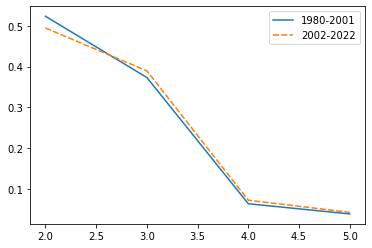

<IPython.core.display.Javascript object>

In [62]:
sns.lineplot(data=value_df[["1980-2001", "2002-2022"]])

Сравним две выборки, т.к. распределение выборки не является нормальным, а размеры выборки малы (n < 30), воспользуемся критерием Манна-Уитни 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

H0 - Hазница средних этих двух выборок не является статистически значимой.

H1 - Hазница средних этих двух выборок является статистически значимой.

In [63]:
stats.mannwhitneyu(value_df["1980-2001"], value_df["2002-2022"], alternative="greater")

MannwhitneyuResult(statistic=7.0, pvalue=0.6571428571428571)

<IPython.core.display.Javascript object>

p-value больше 0.05, следовательно, придерживаемся нулевой гипотезы.

3) У вас появились сомнения — не является ли результат, который вы посчитали на предыдущем шаге, некорректным. Кажется, что на это мог повлиять формат самого матча — best of 3 или best of 5. Оставьте только матчи best of 5 (колонка best_of) и определите — является ли разница среднего количества сетов, которое сыграл победитель, значимой для выборок матчей по 1980 до 2001 гг. и 2002-2022 гг. Выбор статистического теста обоснуйте.

In [64]:
df_sets_of5 = df[(df["score"].notna()) & (df["best_of"] == 5)].loc[
    :, ["tourney_date", "score"]
]

<IPython.core.display.Javascript object>

In [65]:
df_sets_of5["sets_len"] = df_sets_of5["score"].map(lambda x: len(x.split()))

<IPython.core.display.Javascript object>

In [66]:
df_sets_of5 = df_sets_of5[
    (df_sets_of5["sets_len"] > 2)
    & (df_sets_of5["sets_len"] < 6)
    & (df_sets_of5["tourney_date"].dt.year > 1979)
]

<IPython.core.display.Javascript object>

In [67]:
df_sets_of5["year"] = df_sets_of5["tourney_date"].dt.year

<IPython.core.display.Javascript object>

In [68]:
df_sets_of5["period"] = np.where((df_sets_of5["year"] < 2002), "1980-2001", "2002-2022")

<IPython.core.display.Javascript object>

In [69]:
df_sets_of5

,tourney_date,score,sets_len,year,period
33,1980-02-25,6-2 6-3 6-2,3,1980,1980-2001
251,1980-01-01,6-4 3-6 6-3 6-4,4,1980,1980-2001
282,1980-11-17,6-7 2-6 7-5 6-0 6-3,5,1980,1980-2001
313,1980-03-24,6-2 6-0 6-1,3,1980,1980-2001
344,1980-05-20,6-2 0-6 6-2 6-2,4,1980,1980-2001
...,...,...,...,...,...
2689,2022-11-07,4-2 4-2 4-2,3,2022,2002-2022
2690,2022-11-07,4-3(5) 4-3(6) 3-4(7) 3-4(6) 4-3(3),5,2022,2002-2022
2691,2022-11-07,1-4 4-2 4-3(2) 4-2,4,2022,2002-2022
2692,2022-11-07,4-3(5) 4-3(5) 4-3(5),3,2022,2002-2022


<IPython.core.display.Javascript object>

In [70]:
print(
    df_sets_of5[df_sets_of5["period"] == "1980-2001"]["sets_len"].value_counts(
        normalize=True
    )
)
print()
print(
    df_sets_of5[df_sets_of5["period"] == "2002-2022"]["sets_len"].value_counts(
        normalize=True
    )
)

3    0.495522
4    0.309180
5    0.195298
Name: sets_len, dtype: float64

3    0.508547
4    0.303213
5    0.188240
Name: sets_len, dtype: float64


<IPython.core.display.Javascript object>

In [71]:
value_1_of5 = df_sets_of5[df_sets_of5["period"] == "1980-2001"][
    "sets_len"
].value_counts(normalize=True)

<IPython.core.display.Javascript object>

In [72]:
value_2_of5 = df_sets_of5[df_sets_of5["period"] == "2002-2022"][
    "sets_len"
].value_counts(normalize=True)

<IPython.core.display.Javascript object>

In [73]:
value_1_df_of5 = value_1_of5.to_frame(name="1980-2001")

<IPython.core.display.Javascript object>

In [74]:
value_2_df_of5 = value_2_of5.to_frame(name="2002-2022")

<IPython.core.display.Javascript object>

In [75]:
value_df_of5 = pd.concat([value_1_df_of5, value_2_df_of5], axis=1)

<IPython.core.display.Javascript object>

In [76]:
value_df_of5

,1980-2001,2002-2022
3,0.495522,0.508547
4,0.309180,0.303213
5,0.195298,0.188240


<IPython.core.display.Javascript object>

<AxesSubplot: >

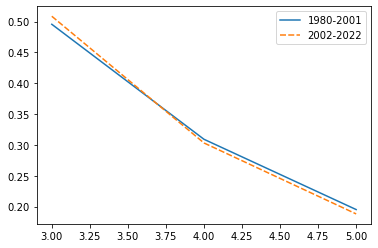

<IPython.core.display.Javascript object>

In [77]:
sns.lineplot(data=value_df_of5[["1980-2001", "2002-2022"]])

Сравним две выборки, т.к. распределение выборки не является нормальным, а размеры выборки малы (n < 30), воспользуемся критерием Манна-Уитни https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    
H0 - Hазница средних этих двух выборок не является статистически значимой.

H1 - Hазница средних этих двух выборок является статистически значимой.   

In [78]:
stats.mannwhitneyu(
    value_df_of5["1980-2001"], value_df_of5["2002-2022"], alternative="greater"
)

MannwhitneyuResult(statistic=5.0, pvalue=0.5)

<IPython.core.display.Javascript object>

p-value больше 0.05, следовательно, придерживаемся нулевой гипотезы.

4 )Вы хотите изучить психологическую устойчивость профессиональных игроков в теннис. Одним из важных показателей такой устойчивости будет доля выигранных брейк-поинтов. Возьмите трех игроков (они необязательно должны играть в одно и то же время. Можете взять игроков, которые сильно отличаются по рангу, а можете взять примерно равных игроков), для каждого из них посчитайте долю выигранных брейк поинтов (колонки, заканчивающиеся на bpFaced и bpSaved) отдельно в победных и проигранных матчах за минимум 10 лет (можно больше, но годы должны идти подряд). Постройте box-plot’ы для этих статистик для каждого из игроков. Являются ли эти распределения по годам (по победным и по проигранным матчам) независимыми для каждого из игроков? Если сравнивать эту статистику между игроками — будет ли разница в средних для проигранных и выигранных матчей значимой попарно между всеми игроками? Выбор статистического теста обоснуйте.

In [79]:
df["year"] = df["tourney_date"].dt.year

<IPython.core.display.Javascript object>

In [80]:
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,1980-1725,Pepsi Grand Slam,Clay,4,A,1980-02-08,1,100437,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,6.0,NaN,1980
1,1980-1725,Pepsi Grand Slam,Clay,4,A,1980-02-08,2,100342,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2.0,NaN,1980
2,1980-1725,Pepsi Grand Slam,Clay,4,A,1980-02-08,3,100437,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,NaN,1980
3,1980-205,Lagos,Clay,32,A,1980-02-25,1,100259,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,1980
4,1980-205,Lagos,Clay,32,A,1980-02-25,2,100135,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2023-0891,Pune,Hard,32,A,2023-01-02,276,111581,NaN,NaN,...,21.0,10.0,9.0,6.0,10.0,113.0,507.0,NaN,NaN,2023
102,2023-0891,Pune,Hard,32,A,2023-01-02,275,126127,NaN,NaN,...,16.0,4.0,7.0,1.0,5.0,60.0,781.0,115.0,490.0,2023
103,2023-0891,Pune,Hard,32,A,2023-01-02,273,111513,NaN,NaN,...,21.0,11.0,9.0,2.0,5.0,70.0,738.0,50.0,895.0,2023
104,2023-0891,Pune,Hard,32,A,2023-01-02,272,109739,NaN,Q,...,30.0,19.0,13.0,2.0,6.0,159.0,354.0,127.0,444.0,2023


<IPython.core.display.Javascript object>

Проверяем, везде ли есть информация о брейк поинтах. 

In [81]:
df["l_bpSaved"].isna().sum()

50009

<IPython.core.display.Javascript object>

In [82]:
df[df["l_bpSaved"].notna()].groupby("year").count()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
year,,,,,,,,,,,,,,,,,,,,,
1990,60,60,60,60,60,60,60,60,18,8,...,60,60,60,60,60,60,60,0,60,0
1991,3233,3233,3233,3233,3233,3233,3233,3233,1378,454,...,3233,3233,3233,3233,3233,3233,3228,3078,3220,3072
1992,3316,3316,3316,3316,3316,3316,3316,3316,1440,396,...,3316,3316,3316,3316,3316,3316,3307,3091,3289,3075
1993,3483,3483,3483,3483,3483,3483,3483,3483,1537,428,...,3483,3483,3483,3483,3483,3483,3460,3244,3438,3226
1994,3480,3480,3480,3480,3480,3480,3480,3480,1490,404,...,3480,3480,3480,3480,3480,3480,3475,3351,3462,3342
1995,3375,3375,3375,3375,3375,3375,3375,3375,1440,410,...,3375,3375,3375,3375,3375,3375,3368,3277,3358,3268
1996,3386,3386,3386,3386,3386,3386,3386,3386,1418,398,...,3386,3386,3386,3386,3386,3386,3352,3262,3341,3249
1997,3163,3163,3163,3163,3163,3163,3163,3163,1313,392,...,3163,3163,3163,3163,3163,3163,3163,3163,3154,3151
1998,3225,3225,3225,3225,3225,3225,3225,3225,1318,453,...,3225,3225,3225,3225,3225,3225,3211,3211,3212,3209


<IPython.core.display.Javascript object>

Видим, что информация о брейк поинтах есть только с 1990 года, создадим таблицу без пропусков.

In [83]:
saved_data = df[df["l_bpSaved"].notna()]

<IPython.core.display.Javascript object>

In [84]:
saved_data

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,1991-339,Adelaide,Hard,32,A,1990-12-31,1,101723,NaN,NaN,...,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN,1990
1,1991-339,Adelaide,Hard,32,A,1990-12-31,2,100946,NaN,Q,...,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN,1990
2,1991-339,Adelaide,Hard,32,A,1990-12-31,3,101234,NaN,NaN,...,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN,1990
3,1991-339,Adelaide,Hard,32,A,1990-12-31,4,101889,8.0,NaN,...,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN,1990
4,1991-339,Adelaide,Hard,32,A,1990-12-31,5,101274,NaN,NaN,...,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2023-0891,Pune,Hard,32,A,2023-01-02,276,111581,NaN,NaN,...,21.0,10.0,9.0,6.0,10.0,113.0,507.0,NaN,NaN,2023
102,2023-0891,Pune,Hard,32,A,2023-01-02,275,126127,NaN,NaN,...,16.0,4.0,7.0,1.0,5.0,60.0,781.0,115.0,490.0,2023
103,2023-0891,Pune,Hard,32,A,2023-01-02,273,111513,NaN,NaN,...,21.0,11.0,9.0,2.0,5.0,70.0,738.0,50.0,895.0,2023
104,2023-0891,Pune,Hard,32,A,2023-01-02,272,109739,NaN,Q,...,30.0,19.0,13.0,2.0,6.0,159.0,354.0,127.0,444.0,2023


<IPython.core.display.Javascript object>

In [85]:
saved_data["w_bpSaved"].isna().sum()

0

<IPython.core.display.Javascript object>

In [86]:
saved_data = saved_data.loc[
    :,
    [
        "tourney_id",
        "winner_id",
        "winner_name",
        "loser_id",
        "year",
        "l_bpSaved",
        "w_bpSaved",
        "w_bpFaced",
        "l_bpFaced",
    ],
]

<IPython.core.display.Javascript object>

Оставим только необходимые нам колонки.

In [87]:
saved_data

,tourney_id,winner_id,winner_name,loser_id,year,l_bpSaved,w_bpSaved,w_bpFaced,l_bpFaced
0,1991-339,101723,Magnus Larsson,101414,1990,6.0,2.0,4.0,8.0
1,1991-339,100946,Slobodan Zivojinovic,101256,1990,1.0,9.0,10.0,2.0
2,1991-339,101234,Patrik Kuhnen,101421,1990,4.0,1.0,1.0,8.0
3,1991-339,101889,Todd Woodbridge,101703,1990,5.0,3.0,3.0,8.0
4,1991-339,101274,Udo Riglewski,101843,1990,4.0,7.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...
101,2023-0891,111581,Michael Mmoh,211768,2023,6.0,2.0,3.0,10.0
102,2023-0891,126127,Benjamin Bonzi,202358,2023,1.0,0.0,0.0,5.0
103,2023-0891,111513,Laslo Djere,144684,2023,2.0,0.0,0.0,5.0
104,2023-0891,109739,Maximilian Marterer,111200,2023,2.0,0.0,2.0,6.0


<IPython.core.display.Javascript object>

Нам нужены id всех учасников из данной таблицы

In [111]:
players_winner = saved_data["winner_id"]
players_loser = saved_data["loser_id"]

players_ser = players_winner.append([players_loser])

players_ser = players_ser.drop_duplicates()

len(players_ser)

C:\Users\oldva\AppData\Local\Temp\ipykernel_604\4073968356.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  players_ser = players_winner.append([players_loser])


2376

<IPython.core.display.Javascript object>

Из условия нам необходимо взять спортсменов игравших не менее 10 лет подряд.

In [112]:
players = []
for x in players_ser:
    player = saved_data[(saved_data["winner_id"] == x) | (saved_data["loser_id"] == x)]
    if player.groupby("year").count().shape[0] > 9:
        if player.groupby("year").count().index[9] == (player["year"].min() + 9):
            players.append(x)

print(len(players))

253


<IPython.core.display.Javascript object>

C:\Users\oldva\AppData\Local\Temp\ipykernel_604\4135980617.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player["saved_rate"] = np.where(
C:\Users\oldva\AppData\Local\Temp\ipykernel_604\4135980617.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player["win/loss"] = np.where(player["winner_id"] == player_id, "win", "loss")
C:\Users\oldva\AppData\Local\Temp\ipykernel_604\4135980617.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

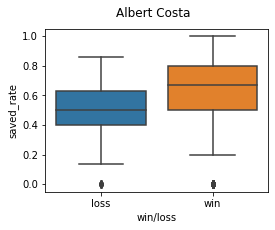

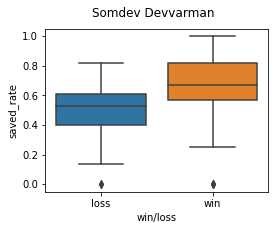

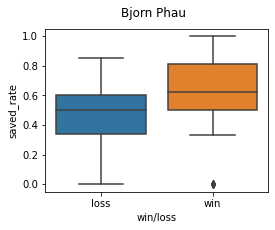

<IPython.core.display.Javascript object>

In [113]:
def box_plot_player():
    player_id = random.choice(players)
    player = saved_data[
        (saved_data["winner_id"] == player_id) | (saved_data["loser_id"] == player_id)
    ]
    player["saved_rate"] = np.where(
        player["winner_id"] == player_id,
        player["w_bpSaved"] / player["w_bpFaced"],
        player["l_bpSaved"] / player["l_bpFaced"],
    ).round(2)
    player["win/loss"] = np.where(player["winner_id"] == player_id, "win", "loss")
    fig = plt.figure(figsize=(4, 3))
    fig.suptitle(
        saved_data[saved_data["winner_id"] == player_id]["winner_name"].iloc[0]
    )
    sns.boxplot(data=player, x="win/loss", y="saved_rate")


box_plot_player()
box_plot_player()
box_plot_player()

На box-plot’ах видно, что в выигранных матчах количество взятых брейкпоинтов выше.

5) У вас есть гипотеза, что доля выигранных брейк-поинтов связана с вероятностью победить в игре. Соберите статистику, где для каждого матча будет собран его исход (победа/поражение) и доля выигранных брейк-поинтов (не забудьте, что в матче два игрока). Разделите долю выигранных брейкпоинтов на группы выше/ниже медианы и, используя информацию о исходе матча, проверьте зависимость между количеством выигранных брейкпоинтов и результатом матча. Насколько сильна эта зависимость? Выбор статистического теста обоснуйте.

H0 - Нулевая гипотеза: количество взятых брейкпоинтов у победителей, не отличается от количества взятых брейкпоинтов у проигравших.

H1 - Альтернативная гипотеза: количество взятых брейкпоинтов у победителей, больше чем у проигравших.


Проверим гипотезу с помощью t-теста (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).

In [116]:
saved_data

,tourney_id,winner_id,winner_name,loser_id,year,l_bpSaved,w_bpSaved,w_bpFaced,l_bpFaced
0,1991-339,101723,Magnus Larsson,101414,1990,6.0,2.0,4.0,8.0
1,1991-339,100946,Slobodan Zivojinovic,101256,1990,1.0,9.0,10.0,2.0
2,1991-339,101234,Patrik Kuhnen,101421,1990,4.0,1.0,1.0,8.0
3,1991-339,101889,Todd Woodbridge,101703,1990,5.0,3.0,3.0,8.0
4,1991-339,101274,Udo Riglewski,101843,1990,4.0,7.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...
101,2023-0891,111581,Michael Mmoh,211768,2023,6.0,2.0,3.0,10.0
102,2023-0891,126127,Benjamin Bonzi,202358,2023,1.0,0.0,0.0,5.0
103,2023-0891,111513,Laslo Djere,144684,2023,2.0,0.0,0.0,5.0
104,2023-0891,109739,Maximilian Marterer,111200,2023,2.0,0.0,2.0,6.0


<IPython.core.display.Javascript object>

In [122]:
break_point_loss = pd.concat(
    [
        (saved_data["l_bpSaved"] / saved_data["l_bpFaced"]).reset_index(drop=True),
        pd.Series(np.zeros_like(saved_data["l_bpFaced"]), name="win"),
    ],
    axis=1,
)

break_point_loss = break_point_loss.rename(columns={0: "break_point"})

<IPython.core.display.Javascript object>

In [123]:
break_point_loss

,break_point,win
0,0.750000,0.0
1,0.500000,0.0
2,0.500000,0.0
3,0.625000,0.0
4,0.500000,0.0
...,...,...
92319,0.600000,0.0
92320,0.200000,0.0
92321,0.400000,0.0
92322,0.333333,0.0


<IPython.core.display.Javascript object>

In [154]:
break_point_win = pd.concat(
    [
        (saved_data["w_bpSaved"] / saved_data["w_bpFaced"]).reset_index(drop=True),
        pd.Series(np.ones_like(saved_data["w_bpFaced"]), name="win"),
    ],
    axis=1,
)

break_point_win = break_point_win.rename(columns={0: "break_point"})

<IPython.core.display.Javascript object>

In [155]:
break_point_win

,break_point,win
0,0.500000,1.0
1,0.900000,1.0
2,1.000000,1.0
3,1.000000,1.0
4,0.875000,1.0
...,...,...
92319,0.666667,1.0
92320,NaN,1.0
92321,NaN,1.0
92322,0.000000,1.0


<IPython.core.display.Javascript object>

In [156]:
break_point = pd.concat([break_point_win, break_point_loss])

<IPython.core.display.Javascript object>

In [157]:
break_point = break_point.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [158]:
break_point

,break_point,win
0,0.500000,1.0
1,0.900000,1.0
2,1.000000,1.0
3,1.000000,1.0
4,0.875000,1.0
...,...,...
184643,0.600000,0.0
184644,0.200000,0.0
184645,0.400000,0.0
184646,0.333333,0.0


<IPython.core.display.Javascript object>

In [159]:
break_point["many_break_point"] = (
    break_point["break_point"] > break_point["break_point"].median()
)

<IPython.core.display.Javascript object>

In [160]:
break_point

,break_point,win,many_break_point
0,0.500000,1.0,False
1,0.900000,1.0,True
2,1.000000,1.0,True
3,1.000000,1.0,True
4,0.875000,1.0,True
...,...,...,...
184643,0.600000,0.0,False
184644,0.200000,0.0,False
184645,0.400000,0.0,False
184646,0.333333,0.0,False


<IPython.core.display.Javascript object>

In [161]:
pd.crosstab(
    break_point["win"].astype(bool), break_point["many_break_point"], normalize=True
)

many_break_point,False,True
win,,
False,0.341087,0.158913
True,0.217414,0.282586


<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='win', ylabel='break_point'>

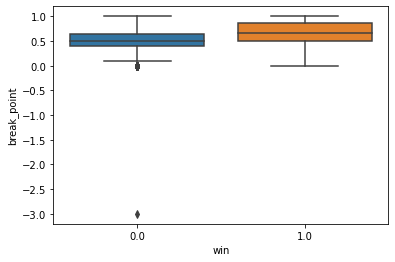

<IPython.core.display.Javascript object>

In [162]:
sns.boxplot(data=break_point, x="win", y="break_point")

In [163]:
break_point = break_point[break_point["break_point"] >= 0]

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='win', ylabel='break_point'>

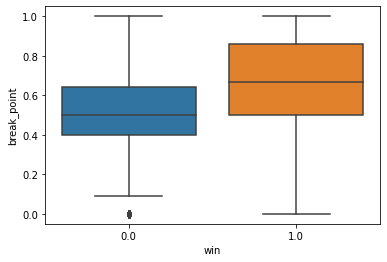

<IPython.core.display.Javascript object>

In [164]:
sns.boxplot(data=break_point, x="win", y="break_point")

Так как по условию требовалось разделить долю выигранных брейкпоинтов на группы выше/ниже медианы, мы получили категориальные признаки, а для их сравнения лучше подойдет метод: Х**2. 

H0 - Нулевая гипотеза: количество взятых брейкпоинтов у победителей, не отличается от количества взятых брейкпоинтов у проигравших.

H1 - Альтернативная гипотеза: количество взятых брейкпоинтов у победителей, больше чем у проигравших.

(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html).

In [165]:
stats.chi2_contingency(
    pd.crosstab(break_point["win"].astype(bool), break_point["many_break_point"])
)

(16134.207231635748,
 0.0,
 1,
 array([[49470.67435154, 42620.32564846],
        [45154.32564846, 38901.67435154]]))

<IPython.core.display.Javascript object>

Принимаем альтернативную гипотезу.